In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

from collections import Counter
from wordcloud import WordCloud

from sklearn.decomposition import PCA, TruncatedSVD, LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Wczytanie danych

In [ ]:
data = pd.read_csv("data/cleaned_transcripts_clustering.csv").rename(columns={"Unnamed: 0" : "video_index"})
data

,video_index,text
0,0,good grant entry must first answer simple ques...
1,1,video sponsor hubsport country home million p...
2,2,devastation suffer wwii struggle nation life g...
3,3,become intimidate military force europe ’s mak...
4,4,number percentage increase size economy gdp p...
...,...,...
371,492,hey travel buddy kat cezary one kiwicom world ...
372,493,go bad vlog life know love bread thing thing c...
373,494,hello friend video cross border terespol brest...
374,496,hello welcome back border today head east musi...


Dodatkowe stop words:

In [4]:
stopwords = ( "s", "okay", "go", "one")

data["text"] = data["text"].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))

<hr> 

# K-means dla tf idf

na tf idf i macierzy zrdukowanej PCA

In [5]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data["text"])
tfidf = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names_out())
tfidf

,aani,abalone,abandon,abandoned,abbas,abbott,abbreviation,abby,abc,abdal,...,świętojańska,świętokrzyskie,šiauliai,żabka,żaneta,żeligowski,żółkiewski,аnd,водка,еven
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.011536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.084568,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Redukcja wymiarów za pomocą PCA dla 90% wyjasnialnosci

In [6]:
variance90 = PCA(n_components=0.9)
variance90.fit_transform(tfidf)
components = variance90.n_components_

print(f"Do wyjaśneinia 90% wariancji trzeba {components} składowych głównych")

Do wyjaśneinia 90% wariancji trzeba 291 składowych głównych


In [7]:
pca = PCA(n_components=290)
matrix_pca = pca.fit_transform(tfidf)

#### k-means dla dwóch grup

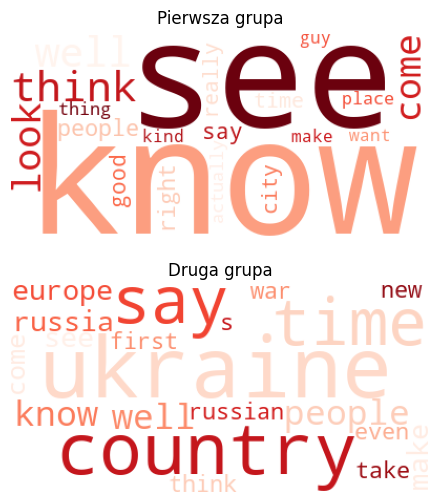

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(matrix_pca)

transcripts_kmeans1 = data.copy()
transcripts_kmeans1["cluster"] = kmeans_labels


cluster1 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==0]["text"]
cluster2 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==1]["text"]

wordcloud1 = WordCloud(background_color="white", max_words=20, colormap = "Reds").generate(' '.join(cluster1))
wordcloud2 = WordCloud(background_color = "white", max_words=20, colormap = "Reds").generate(' '.join(cluster2))

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.imshow(wordcloud1)
plt.title("Pierwsza grupa")
plt.axis("off")

plt.subplot(2,1,2)
plt.imshow(wordcloud2)
plt.title("Druga grupa")
plt.axis("off")

plt.show()

In [10]:
print("Liczba dokumentów w grupie 1:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 0]["cluster"].count())
print("Liczba dokumentów w grupie 2:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 1]["cluster"].count())

Liczba dokumentów w grupie 1: 145
Liczba dokumentów w grupie 2: 231


#### Mierniki jakości

In [11]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(matrix_pca, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.018492280393410533


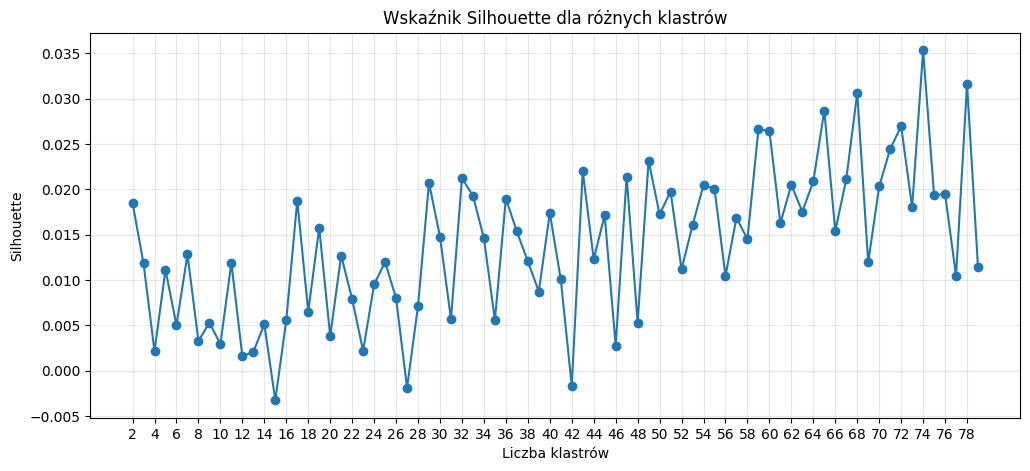

In [ ]:
num_clusters = range(2, 80)
silhouette_scores = []
inertia_values = []

for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans_labels = kmeans.fit_predict(matrix_pca)

    transcripts_kmeans = data.copy()
    transcripts_kmeans["cluster"] = kmeans_labels

    silhouette_avg = silhouette_score(matrix_pca, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Wskaźnik Silhouette dla różnych klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette')
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 2))  # Ustawienia co 2 na osi x
plt.grid(alpha=0.3)
plt.show()


k-means dla trzech grup

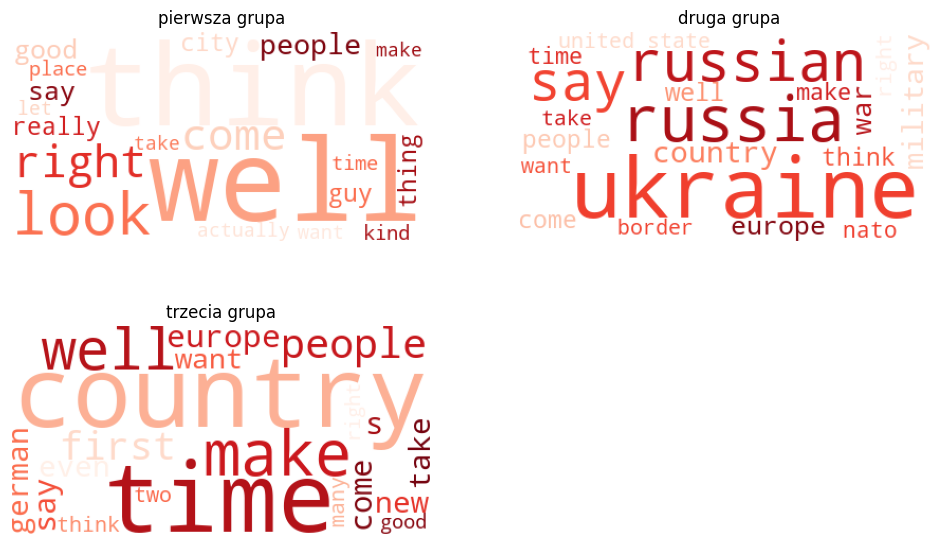

In [282]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(matrix_pca)

transcripts_kmeans1 = data.copy()
transcripts_kmeans1["cluster"] = kmeans_labels

cluster1 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==0]["text"]
cluster2 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==1]["text"]
cluster3 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==2]["text"]

wordcloud1 = WordCloud(background_color="white", max_words=20, colormap='Reds').generate(' '.join(cluster1))
wordcloud2 = WordCloud(background_color = "white", max_words=20, colormap='Reds').generate(' '.join(cluster2))
wordcloud3 = WordCloud(background_color = "white", max_words=20, colormap='Reds').generate(' '.join(cluster3))

plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
plt.imshow(wordcloud1)
plt.title("pierwsza grupa")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(wordcloud2)
plt.title("druga grupa")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(wordcloud3)
plt.title("trzecia grupa")
plt.axis("off")


plt.show()

In [283]:
print("Liczba dokumentów w grupie 1:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 0]["cluster"].count())
print("Liczba dokumentów w grupie 2:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 1]["cluster"].count())
print("Liczba dokumentów w grupie 3:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 2]["cluster"].count())

Liczba dokumentów w grupie 1: 118
Liczba dokumentów w grupie 2: 44
Liczba dokumentów w grupie 3: 214


k-means dla czterech grup

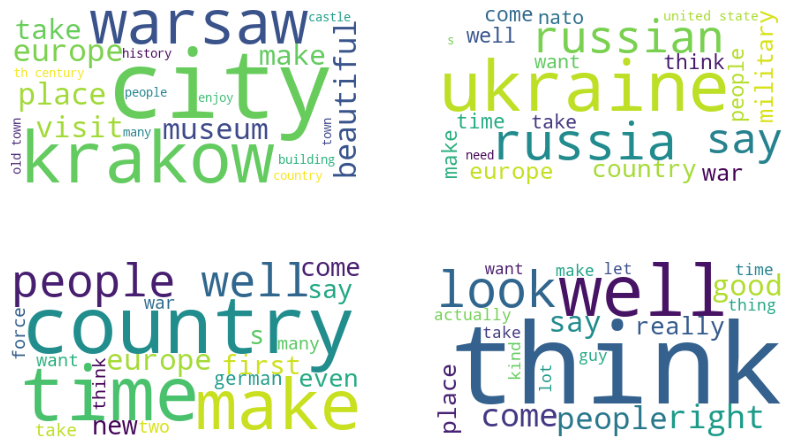

In [284]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(matrix_pca)

transcripts_kmeans1 = data.copy()
transcripts_kmeans1["cluster"] = kmeans_labels

cluster1 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==0]["text"]
cluster2 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==1]["text"]
cluster3 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==2]["text"]
cluster4 = transcripts_kmeans1[transcripts_kmeans1["cluster"]==3]["text"]

wordcloud1 = WordCloud(background_color="white", max_words=20).generate(' '.join(cluster1))
wordcloud2 = WordCloud(background_color = "white", max_words=20).generate(' '.join(cluster2))
wordcloud3 = WordCloud(background_color = "white", max_words=20).generate(' '.join(cluster3))
wordcloud4 = WordCloud(background_color = "white", max_words=20).generate(' '.join(cluster4))

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.imshow(wordcloud1)
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(wordcloud2)
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(wordcloud3)
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(wordcloud4)
plt.axis("off")

plt.show()

In [285]:
print("Liczba dokumentów w grupie 1:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 0]["cluster"].count())
print("Liczba dokumentów w grupie 2:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 1]["cluster"].count())
print("Liczba dokumentów w grupie 3:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 2]["cluster"].count())
print("Liczba dokumentów w grupie 4:", transcripts_kmeans1[transcripts_kmeans1["cluster"]== 3]["cluster"].count())

Liczba dokumentów w grupie 1: 22
Liczba dokumentów w grupie 2: 40
Liczba dokumentów w grupie 3: 187
Liczba dokumentów w grupie 4: 127


# LDA dla tf

dla tf i bez redukcji macierzy poniewaz trzeba wtedy jeszcze zrobic skalowanie i wychodza glupoty

In [23]:
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(data["text"])
tf = pd.DataFrame(tf.toarray(), columns = vectorizer.get_feature_names_out())
tf

,aani,abalone,abandon,abandoned,abbas,abbott,abbreviation,abby,abc,abdal,...,świętojańska,świętokrzyskie,šiauliai,żabka,żaneta,żeligowski,żółkiewski,аnd,водка,еven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


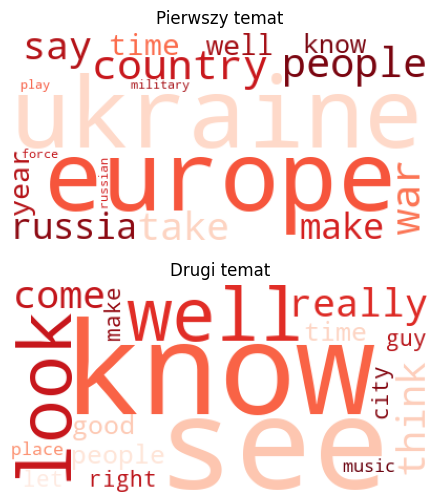

In [24]:
lda = LatentDirichletAllocation(n_components=2, random_state=0)
topics = lda.fit_transform(tf)

transcripts_lda1 = data.copy() 
transcripts_lda1["topic_1"] = topics[:,0]
transcripts_lda1["topic_2"] = topics[:,1]
transcripts_lda1

feature_names = tf.columns

importance_words_1 = lda.components_[0]
top_index_1 = importance_words_1.argsort()[:-21:-1]
top_words_1 = [feature_names[i] for i in top_index_1]

importance_words_2 = lda.components_[1]
top_index_2 = importance_words_2.argsort()[:-21:-1]
top_words_2 = [feature_names[i] for i in top_index_2]

wordcloud1 = WordCloud(background_color="white", colormap="Reds").generate(' '.join(top_words_1))
wordcloud2 = WordCloud(background_color="white", colormap="Reds").generate(' '.join(top_words_2))

plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.imshow(wordcloud1)
plt.title("Pierwszy temat")
plt.axis("off")

plt.subplot(2,1,2)
plt.imshow(wordcloud2)
plt.title("Drugi temat")
plt.axis("off")

plt.show()

In [25]:
print("Liczba dokumentów w Temacie 1:", len(transcripts_lda1[transcripts_lda1["topic_1"] > transcripts_lda1["topic_2"]]))
print("Liczba dokumentów w Temacie 2:", len(transcripts_lda1[transcripts_lda1["topic_2"] > transcripts_lda1["topic_1"]]))

Liczba dokumentów w Temacie 1: 156
Liczba dokumentów w Temacie 2: 220


#### Mierniki jakości

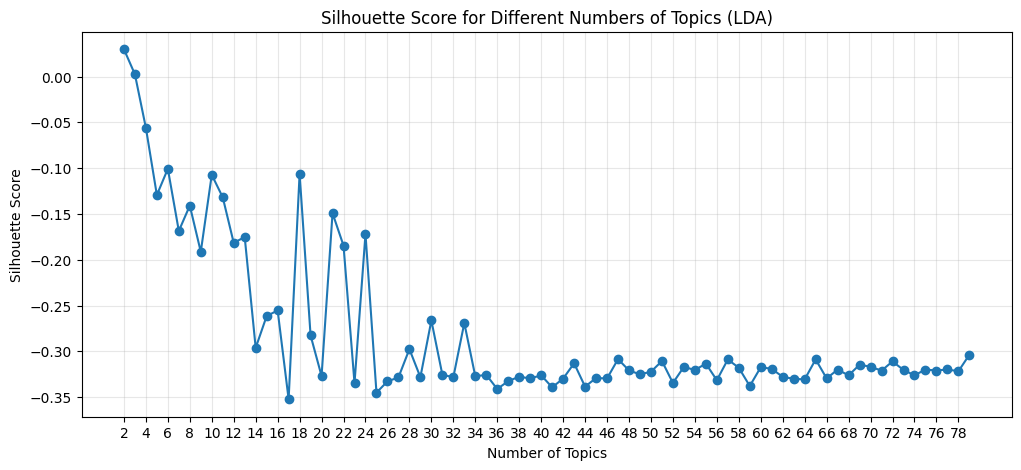

In [ ]:
num_topics_range = range(2, 80)
silhouette_scores_lda = []

for num_topics in num_topics_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    topics = lda.fit_transform(tf)

    silhouette_avg_lda = silhouette_score(tf, np.argmax(topics, axis=1))
    silhouette_scores_lda.append(silhouette_avg_lda)

plt.figure(figsize=(12, 5))
plt.plot(num_topics_range, silhouette_scores_lda, marker='o')
plt.title('Silhouette Score for Different Numbers of Topics (LDA)')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(num_topics_range), max(num_topics_range)+1, 2))  # ustawienia co 2 na osi x
plt.grid(alpha = 0.3)
plt.show()


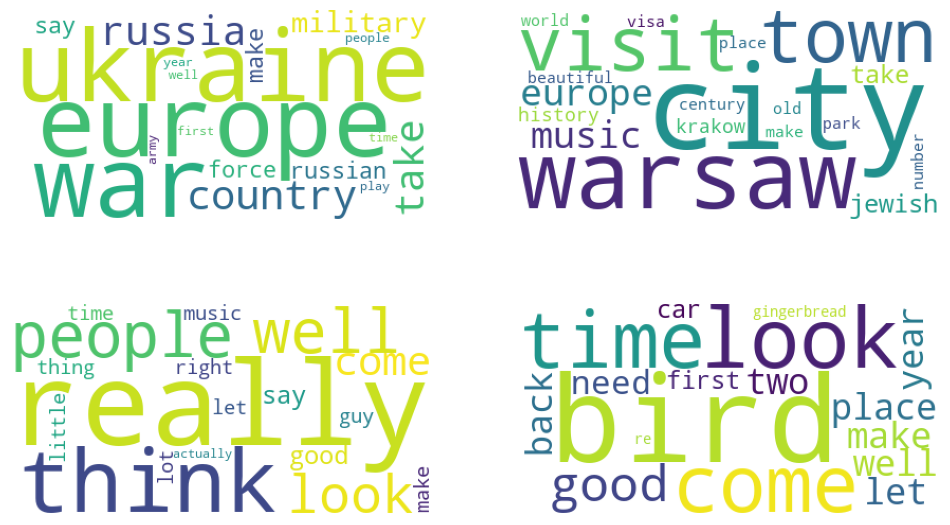

In [289]:
lda = LatentDirichletAllocation(n_components=4, random_state=0)
topics = lda.fit_transform(tf)

transcripts_lda3 = data.copy() 
transcripts_lda3["topic_1"] = topics[:,0]
transcripts_lda3["topic_2"] = topics[:,1]
transcripts_lda3["topic_3"] = topics[:,2]
transcripts_lda3["topic_4"] = topics[:,3]

feature_names = tf.columns

importance_words_1 = lda.components_[0]
top_index_1 = importance_words_1.argsort()[:-21:-1]
top_words_1 = [feature_names[i] for i in top_index_1]

importance_words_2 = lda.components_[1]
top_index_2 = importance_words_2.argsort()[:-21:-1]
top_words_2 = [feature_names[i] for i in top_index_2]

importance_words_3 = lda.components_[2]
top_index_3 = importance_words_3.argsort()[:-21:-1]
top_words_3 = [feature_names[i] for i in top_index_3]

importance_words_4 = lda.components_[3]
top_index_4 = importance_words_4.argsort()[:-21:-1]
top_words_4 = [feature_names[i] for i in top_index_4]

wordcloud1 = WordCloud(background_color="white").generate(' '.join(top_words_1))
wordcloud2 = WordCloud(background_color="white").generate(' '.join(top_words_2))
wordcloud3 = WordCloud(background_color="white").generate(' '.join(top_words_3))
wordcloud4 = WordCloud(background_color="white").generate(' '.join(top_words_4))

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.imshow(wordcloud1)
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(wordcloud2)
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(wordcloud3)
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(wordcloud4)
plt.axis("off")

plt.show()

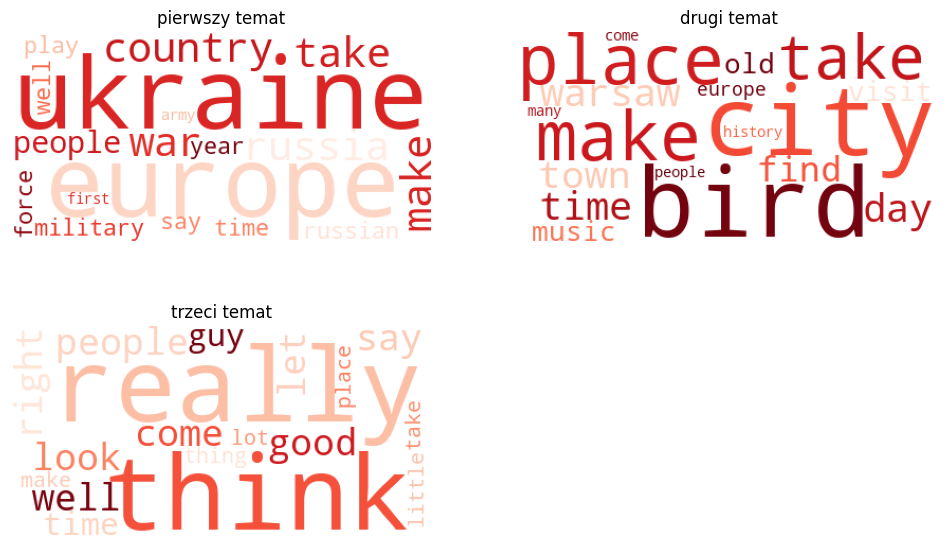

In [290]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)
topics = lda.fit_transform(tf)

transcripts_lda2 = data.copy() 
transcripts_lda2["topic_1"] = topics[:,0]
transcripts_lda2["topic_2"] = topics[:,1]
transcripts_lda2["topic_3"] = topics[:,2]

feature_names = tf.columns

importance_words_1 = lda.components_[0]
top_index_1 = importance_words_1.argsort()[:-21:-1]
top_words_1 = [feature_names[i] for i in top_index_1]

importance_words_2 = lda.components_[1]
top_index_2 = importance_words_2.argsort()[:-21:-1]
top_words_2 = [feature_names[i] for i in top_index_2]

importance_words_3 = lda.components_[2]
top_index_3 = importance_words_3.argsort()[:-21:-1]
top_words_3 = [feature_names[i] for i in top_index_3]


wordcloud1 = WordCloud(background_color="white", colormap='Reds').generate(' '.join(top_words_1))
wordcloud2 = WordCloud(background_color="white", colormap='Reds').generate(' '.join(top_words_2))
wordcloud3 = WordCloud(background_color="white", colormap='Reds').generate(' '.join(top_words_3))

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.imshow(wordcloud1)
plt.title("pierwszy temat")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(wordcloud2)
plt.title("drugi temat")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(wordcloud3)
plt.title("trzeci temat")
plt.axis("off")


plt.show()

In [ ]:
num_docs_topic_1 = len(transcripts_lda2[transcripts_lda2["topic_1"] > transcripts_lda2[["topic_2", "topic_3"]].max(axis=1)])
num_docs_topic_2 = len(transcripts_lda2[transcripts_lda2["topic_2"] > transcripts_lda2[["topic_1", "topic_3"]].max(axis=1)])
num_docs_topic_3 = len(transcripts_lda2[transcripts_lda2["topic_3"] > transcripts_lda2[["topic_1", "topic_2"]].max(axis=1)])

print("Liczba dokumentów w Temacie 1:", num_docs_topic_1)
print("Liczba dokumentów w Temacie 2:", num_docs_topic_2)
print("Liczba dokumentów w Temacie 3:", num_docs_topic_3)

Liczba dokumentów w Temacie 1: 143
Liczba dokumentów w Temacie 2: 68
Liczba dokumentów w Temacie 3: 165
